<a href="https://colab.research.google.com/github/ReddyRajitha/Weather-Prediction/blob/main/Weather_prediction(project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#TITTLE: "Enhanced Wheather Prediction Using Machine learning and Data Analytics"

#1)   DATA COLLECTION:
import pandas as pd
data=pd.read_csv("/content/seattle-weather.csv")
data

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [ ]:
print(data.head())

         date  precipitation  temp_max  temp_min  wind  weather
0  2012-01-01            0.0      12.8       5.0   4.7  drizzle
1  2012-01-02           10.9      10.6       2.8   4.5     rain
2  2012-01-03            0.8      11.7       7.2   2.3     rain
3  2012-01-04           20.3      12.2       5.6   4.7     rain
4  2012-01-05            1.3       8.9       2.8   6.1     rain


In [ ]:
#  2)DATA PREPROCESSING
print(data.isnull().sum())

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64


In [ ]:
data.fillna(method='ffill',inplace=True)
#if any null values found filling with forward values

In [ ]:
data['date']=pd.to_datetime(data['date'])
data

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [ ]:
#convert categorical data to numerical data

In [ ]:
data=pd.get_dummies(data,columns=['weather'])

In [ ]:
#Normalize numeric features
from sklearn.preprocessing import StandardScaler
numerical_features=data.select_dtypes(include=['float64','int64']).columns
scaler=StandardScaler()
data[numerical_features]=scaler.fit_transform(data[numerical_features])
data

,date,precipitation,temp_max,temp_min,wind,weather_drizzle,weather_fog,weather_rain,weather_snow,weather_sun
0,2012-01-01,-0.453650,-0.495299,-0.644212,1.014980,True,False,False,False,False
1,2012-01-02,1.178598,-0.794731,-1.082347,0.875833,False,False,True,False,False
2,2012-01-03,-0.333852,-0.645015,-0.206077,-0.654780,False,False,True,False,False
3,2012-01-04,2.586224,-0.576962,-0.524720,1.014980,False,False,True,False,False
4,2012-01-05,-0.258978,-1.026111,-1.082347,1.989006,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...
1456,2015-12-27,0.834179,-1.638585,-1.301414,-0.237340,False,False,True,False,False
1457,2015-12-28,-0.229029,-1.556922,-1.301414,-1.350513,False,False,True,False,False
1458,2015-12-29,-0.453650,-1.257490,-1.520481,-0.446060,False,True,False,False,False
1459,2015-12-30,-0.453650,-1.475259,-1.839125,0.110527,False,False,False,False,True


In [ ]:
#     3)FEATURE ENGINEERING
#Example: adding month and year as features
data['temp_diff']=data['temp_max']-data['temp_min']
data
correlation_matrix=data.corr(numeric_only=True)
important_features=correlation_matrix['precipitation'].sort_values(ascending=False).index[:10]
data=data[important_features]
data


,precipitation,weather_rain,wind,weather_snow,month,year,temp_min,weather_drizzle,weather_fog,temp_max
0,-0.453650,False,1.014980,False,1,1,-0.644212,True,False,-0.495299
1,1.178598,True,0.875833,False,1,1,-1.082347,False,False,-0.794731
2,-0.333852,True,-0.654780,False,1,1,-0.206077,False,False,-0.645015
3,2.586224,True,1.014980,False,1,1,-0.524720,False,False,-0.576962
4,-0.258978,True,1.989006,False,1,1,-1.082347,False,False,-1.026111
...,...,...,...,...,...,...,...,...,...,...
1456,0.834179,True,-0.237340,False,12,12,-1.301414,False,False,-1.638585
1457,-0.229029,True,-1.350513,False,12,12,-1.301414,False,False,-1.556922
1458,-0.453650,False,-0.446060,False,12,12,-1.520481,False,True,-1.257490
1459,-0.453650,False,0.110527,False,12,12,-1.839125,False,False,-1.475259


In [ ]:
#    4)MODEL SELECTION
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestRegressor
#Setting the target and features
X=data.drop('precipitation',axis=1)
y=data['precipitation']
#Splitting the data into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
#Train a Random Forest model
model=RandomForestRegressor()


In [ ]:
#  5)MODEL TRAINING
model.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
#   6)MODEL EVALUATION
from sklearn.metrics import mean_squared_error, r2_score
y_pred=model.predict(X_test)
#Evaluation performance
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f'Mean Squared Error: {mse}')
print('R2 Score:{r2}')

Mean Squared Error: 0.6997739510700043
R2 Score:{r2}


In [ ]:
#   7)MODEL OPTIMIZATION:
from sklearn.model_selection import GridSearchCV
# Hyperparameter tuning
param_grid = {'n_estimators': [100, 200], 'max_depth': [10, 20]}
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

# Predictions with the best model
y_pred_best = best_model.predict(X_test)

# Evaluation metrics after optimization
mse_best = mean_squared_error(y_test, y_pred_best)
print(f'Mean Squared Error after optimization: {mse_best}')

Mean Squared Error after optimization: 0.714013969593925


In [ ]:
#    8)DEPLOYMENT:
import joblib
joblib.dump(best_model, 'best_model.pkl')

['best_model.pkl']

In [ ]:
from flask import Flask, request, jsonify
import joblib
joblib.dump(best_model,'weather_model.pkl')

app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json(force=True)
    prediction = best_model.predict(pd.DataFrame([data]))
    return jsonify(prediction.tolist())
if __name__ == '__ main __':
    app.run(debug=True)


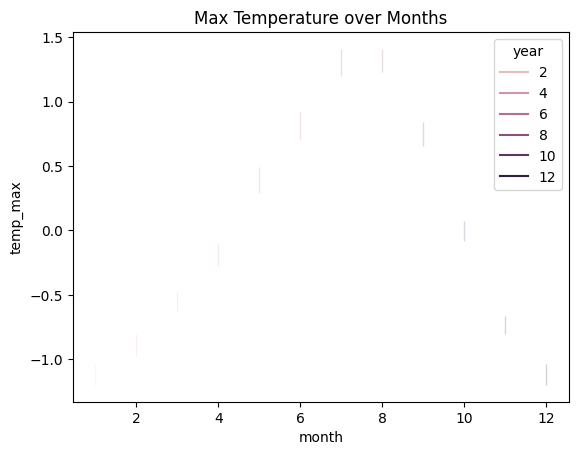

In [ ]:
#    9)DATA VISUALIZATION:
import matplotlib.pyplot as plt
import seaborn as sns
sns.lineplot(data=data, x='month', y='temp_max', hue='year')
plt.title('Max Temperature over Months')
plt.show()

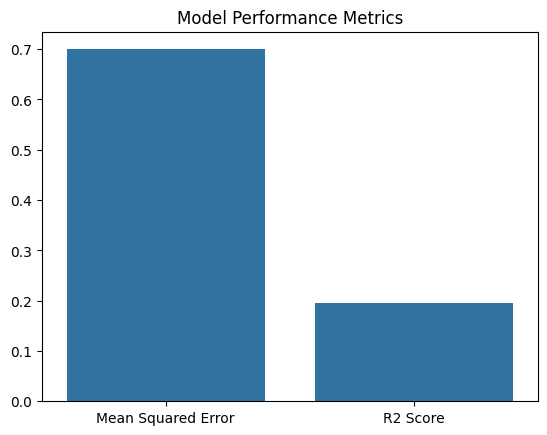

In [ ]:
sns.barplot(x=['Mean Squared Error','R2 Score'],y=[mse ,r2])
plt.title('Model Performance Metrics')
plt.show()